In [35]:
tracks_file_name = "full_features_MC_BNB_AnalysisTrees.csv"
# tracks_file_name = 'full_features_MC_BNB_AnalysisTrees_anatreefiles_0_to_1000.csv'

In [38]:
tracks_file_name = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/" + tracks_file_name

import sys, pandas as pd, numpy as np, matplotlib.pyplot as plt, ast
import matplotlib as mpl , seaborn as sns; sns.set(style="white", color_codes=True , font_scale=1)
%matplotlib inline
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt
dirname = init.createnewdir()
generic = lambda x: ast.literal_eval(x)

# hits data frame
def DataFrame_hits( tracks_df ):
    resrng , dEdx , Edep = tracks_df.residual_range_Y , tracks_df.dEdx_Y , tracks_df.Edep_Y
    if len(resrng) == 0:
        print 'there are no tracks...'
        return False
    resrng = np.concatenate(resrng.ravel())
    dEdx = np.concatenate(dEdx.ravel())
    Edep = np.concatenate(Edep.ravel())
    hits_df = pd.DataFrame(data={'residual_range':resrng,'dEdx':dEdx,'Edep':Edep})
    hits_df = hits_df[ (hits_df.dEdx>0.1) & (hits_df.dEdx<100) & (hits_df.residual_range>0.1) & (hits_df.residual_range<200) ] 
    return hits_df

# hits data frame for high-purity (=1) and low-purity (<0.6) tracks
def DataFrame_hits_lowhigh_purity( tracks_df ):
    tracks_df_low_purity = tracks_df[tracks_df.purtruth_Y<0.6]
    if len(tracks_df_low_purity) == 0:
        print 'there are no low-purity tracks...'
        return False, False
    hits_df_low_purity = DataFrame_hits( tracks_df_low_purity )
    tracks_df_high_purity = tracks_df[tracks_df.purtruth_Y==1]
    if len(tracks_df_high_purity) == 0:
        print 'there are no high-purity tracks...'
        return False, False

    hits_df_high_purity = DataFrame_hits( tracks_df_high_purity )
    return hits_df_low_purity , hits_df_high_purity


# scatter plot
def dEdx_scatter( df_hits , label='' ,color='black' , s=0.1 , alpha=1 , x_text=30, y_text=27):
    x , y = df_hits.residual_range , df_hits.dEdx
    plt.scatter( x ,y ,s=s,color=color,alpha=alpha)
    plt.axis([0,100,0,30])
    plt.xlabel('residual range [cm]')
    plt.ylabel('$dE/dx$ [MeV/cm]')
    plt.text(x_text,y_text,label,color=color)

# scatter plot
def dEdx_scatter_mulitple( df_hits_list , labels ,colors , s=0.1 , alpha=0.8):
    c = 0
    for df_hits,label,color in zip( df_hits_list , labels , colors ):
        dEdx_scatter( df_hits , label=label ,color=color , s=s , alpha=alpha , x_text=30+2*c, y_text=27-c)
        c += 1.5

    
def dEdx_jointplot( df_hits , cmap='hot_r' , label='protons' , x_text=30, y_text=27):
    with sns.axes_style("white"):
        g = sns.jointplot(df_hits.residual_range , df_hits.dEdx , 
                          cmap=cmap, kind="hex", stat_func=None,
                          marginal_kws={'color': 'blue'})
    g.set_axis_labels('residual range [cm]' , '$dE/dx$ [MeV/cm]')
    plt.colorbar()
    g.fig.suptitle(label)

In [39]:
tracks = pd.read_csv(tracks_file_name)

In [52]:
np.fromstring(tracks.residual_range_Y[0])

ValueError: string size must be a multiple of element size


tab completion not implemented for this context


In [75]:
# tracks = pd.read_csv(tracks_file_name,dtype={'dEdx_Y': np.ndarray.dtype})#converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})
tracks = pd.read_csv(tracks_file_name,converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic},nrows=11811)
tracks
# hits = DataFrame_hits( tracks )

,run,subrun,event,track_id,flip,nhits,length,startx,starty,startz,...,Y_end_wire,Y_end_time,purtruth_Y,CaloPDG_U,CaloPDG_V,CaloPDG_Y,residual_range_Y,dqdx_Y,dEdx_Y,Edep_Y
0,4,4255,85082,1,0,187,30.305710,165.508179,-33.184944,358.892914,...,1291,3772,0.326780,13,13,13,"[30.8418750763, 30.6021080017, 30.3234672546, ...","[1705.9085693359375, 1742.71044921875, 1139.20...","[322.165405273, 360.713409424, 55.8373756409, ...","[0.0, -86.487197876, -102.045768738, -104.7852..."
1,4,4255,85082,2,1,20,4.569578,165.000458,-29.521742,359.670990,...,1198,3779,0.837529,321,2212,2212,[0.987208724022],[782.5859375],[18.2451248169],[0.0]
2,4,4255,85084,0,0,673,112.532951,73.091774,-34.078632,146.097076,...,752,2113,0.853454,13,13,13,"[130.227554321, 129.910354614, 129.610122681, ...","[383.5390930175781, 541.9937744140625, 413.122...","[3.44661331177, 6.2292342186, 3.87874794006, 2...","[0.0, -1.97591125965, -3.14043521881, -4.03270..."
3,4,4255,85084,1,0,40,8.747072,62.100948,-107.287560,227.144531,...,764,2032,0.751527,13,211,13,"[10.0496549606, 9.62572097778, 8.40375614166, ...","[195.73121643066406, 982.3732299804688, 109.42...","[1.40224611759, 25.2878246307, 0.75259578228, ...","[0.0, -10.7203683853, -11.6400136948, -319.743..."
4,4,4255,85085,0,0,627,151.324280,205.359924,12.295340,889.846619,...,3257,4487,0.998132,-1,13,13,"[0.621965944767, 1.23129034042, 1.72477066517,...","[790.7544555664062, 484.9232177734375, 454.410...","[15.8604259491, 5.58125495911, 4.97226238251, ...","[0.0, 3.40079474449, 5.85450839996, 7.89960956..."
5,4,4255,85085,1,0,94,16.817625,212.893784,8.174444,901.839172,...,3038,4861,0.907885,13,321,2212,"[0.428929954767, 0.806665360928, 1.29999744892...","[770.7717895507812, 822.130615234375, 667.7124...","[21.001745224, 25.1660442352, 14.4413051605, 1...","[0.0, 9.50610637665, 16.6304664612, 24.1575241..."
6,4,4255,85085,2,0,83,15.478202,205.474915,12.155932,889.332520,...,3007,4626,0.924031,211,13,13,"[0.570345461369, 0.935429751873, 1.2821804285,...","[375.6562805175781, 412.8692626953125, 394.232...","[4.37884235382, 5.15306854248, 4.7514629364, 4...","[0.0, 1.88130438328, 3.5288772583, 5.276103019..."
7,4,4255,85085,3,0,21,5.995297,107.786362,85.694122,976.739136,...,3255,2736,0.995029,-1,13,13,"[0.49232006073, 0.81155359745, 1.22057795525, ...","[486.8818359375, 655.297607421875, 450.3378601...","[5.59332084656, 10.1313724518, 4.87159872055, ...","[0.0, 3.23427391052, 5.22687625885, 7.26332664..."
8,4,4255,85087,0,0,518,102.178780,144.506546,40.013283,21.017199,...,336,3395,0.885195,13,13,13,"[0.675275146961, 1.11338150501, 1.49886512756,...","[273.9897155761719, 225.6634063720703, 226.855...","[2.25529623032, 1.74872922897, 1.76075494289, ...","[0.0, 0.766129374504, 1.44487154484, 2.1963365..."
9,4,4255,85087,1,1,431,107.430412,29.563618,82.825165,179.538498,...,598,2639,0.946586,13,13,13,"[110.592796326, 110.261169434, 109.881774902, ...","[315.23486328125, 299.2695617675781, 241.20336...","[2.4452047348, 2.27613663673, 1.71626150608, 1...","[0.0, -0.754828095436, -1.40596830845, -2.1588..."


In [76]:
tracks = pd.read_csv(tracks_file_name,nrows=11812)


In [78]:
tracks

,run,subrun,event,track_id,flip,nhits,length,startx,starty,startz,...,Y_end_wire,Y_end_time,purtruth_Y,CaloPDG_U,CaloPDG_V,CaloPDG_Y,residual_range_Y,dqdx_Y,dEdx_Y,Edep_Y
0,4,4255,85082,1,0,187,30.305709838867188,165.5081787109375,-33.18494415283203,358.8929138183594,...,1291,3772,0.32678014039993286,13,13,13,"[30.841875076293945, 30.602108001708984, 30.32...","[1705.9085693359375, 1742.71044921875, 1139.20...","[322.1654052734375, 360.7134094238281, 55.8373...","[0.0, -86.48719787597656, -102.04576873779297,..."
1,4,4255,85082,2,1,20,4.569578170776367,165.00045776367188,-29.52174186706543,359.6709899902344,...,1198,3779,0.8375290036201477,321,2212,2212,[0.9872087240219116],[782.5859375],[18.24512481689453],[0.0]
2,4,4255,85084,0,0,673,112.53295135498047,73.0917739868164,-34.07863235473633,146.09707641601562,...,752,2113,0.8534543514251709,13,13,13,"[130.22755432128906, 129.9103546142578, 129.61...","[383.5390930175781, 541.9937744140625, 413.122...","[3.446613311767578, 6.229234218597412, 3.87874...","[0.0, -1.975911259651184, -3.140435218811035, ..."
3,4,4255,85084,1,0,40,8.747072219848633,62.100948333740234,-107.28755950927734,227.14453125,...,764,2032,0.7515271902084351,13,211,13,"[10.049654960632324, 9.625720977783203, 8.4037...","[195.73121643066406, 982.3732299804688, 109.42...","[1.402246117591858, 25.287824630737305, 0.7525...","[0.0, -10.720368385314941, -11.640013694763184..."
4,4,4255,85085,0,0,627,151.32427978515625,205.35992431640625,12.295339584350586,889.8466186523438,...,3257,4487,0.9981318712234497,-1,13,13,"[0.6219659447669983, 1.231290340423584, 1.7247...","[790.7544555664062, 484.9232177734375, 454.410...","[15.86042594909668, 5.581254959106445, 4.97226...","[0.0, 3.400794744491577, 5.854508399963379, 7...."
5,4,4255,85085,1,0,94,16.817625045776367,212.89378356933594,8.174444198608398,901.8391723632812,...,3038,4861,0.9078853130340576,13,321,2212,"[0.4289299547672272, 0.8066653609275818, 1.299...","[770.7717895507812, 822.130615234375, 667.7124...","[21.001745223999023, 25.166044235229492, 14.44...","[0.0, 9.50610637664795, 16.63046646118164, 24...."
6,4,4255,85085,2,0,83,15.478201866149902,205.47491455078125,12.155932426452637,889.33251953125,...,3007,4626,0.9240308403968811,211,13,13,"[0.5703454613685608, 0.9354297518730164, 1.282...","[375.6562805175781, 412.8692626953125, 394.232...","[4.378842353820801, 5.153068542480469, 4.75146...","[0.0, 1.881304383277893, 3.5288772583007812, 5..."
7,4,4255,85085,3,0,21,5.995296955108643,107.78636169433594,85.69412231445312,976.7391357421875,...,3255,2736,0.9950286149978638,-1,13,13,"[0.49232006072998047, 0.8115535974502563, 1.22...","[486.8818359375, 655.297607421875, 450.3378601...","[5.593320846557617, 10.131372451782227, 4.8715...","[0.0, 3.234273910522461, 5.226876258850098, 7...."
8,4,4255,85087,0,0,518,102.17877960205078,144.5065460205078,40.013282775878906,21.01719856262207,...,336,3395,0.8851951360702515,13,13,13,"[0.6752751469612122, 1.1133815050125122, 1.498...","[273.9897155761719, 225.6634063720703, 226.855...","[2.255296230316162, 1.7487292289733887, 1.7607...","[0.0, 0.7661293745040894, 1.4448715448379517, ..."
9,4,4255,85087,1,1,431,107.43041229248047,29.563617706298828,82.82516479492188,179.5384979248047,...,598,2639,0.9465862512588501,13,13,13,"[110.5927963256836, 110.26116943359375, 109.88...","[315.23486328125, 299.2695617675781, 241.20336...","[2.445204734802246, 2.276136636734009, 1.71626...","[0.0, -0.7548280954360962, -1.4059683084487915..."


In [50]:
tracks.dEdx_Y[0]

'[322.1654052734375, 360.7134094238281, 55.83737564086914, 8.806560516357422, 2.1581239700317383, 2.1100447177886963, 2.137669324874878, 1.8487921953201294, 1.948910117149353, 2.6184587478637695, 2.7832677364349365, 3.8427839279174805, 4.841094493865967, 2.5355560779571533, 1.7998498678207397, 1.8673337697982788, 1.643586277961731, 1.7187074422836304, 1.730175495147705, 1.8646024465560913, 1.962544560432434, 2.039602279663086, 1.8622221946716309, 2.095121145248413, 1.9929829835891724, 2.037461519241333, 1.990234613418579, 2.1640260219573975, 1.8687671422958374, 1.9134422540664673, 1.890390157699585, 2.0320284366607666, 2.2470991611480713, 2.4396326541900635, 2.005915880203247, 2.187281847000122, 2.092055082321167, 2.059223175048828, 1.7599107027053833, 1.8583042621612549, 1.7224147319793701, 1.9634839296340942, 1.741614580154419, 1.9437576532363892, 1.9157583713531494, 2.026420831680298, 2.338087320327759, 2.3056538105010986, 1.8626134395599365, 2.061211585998535, 2.0350465774536133, 2

In [3]:
protons = tracks[tracks.MCpdgCode==2212]
p_hits = DataFrame_hits( protons )
p_hits_low_purity , p_hits_high_purity = DataFrame_hits_lowhigh_purity (protons)

there are no low-purity tracks...


In [121]:
muons = tracks[tracks.MCpdgCode==13]
mu_hits = DataFrame_hits( muons )
mu_hits_low_purity , mu_hits_high_purity = DataFrame_hits (muons)

In [123]:
pions = tracks[(tracks.MCpdgCode==211) | (tracks.MCpdgCode==-211)]
pi_hits = DataFrame_hits( pions )
pi_hits_low_purity , pi_hits_high_purity = DataFrame_hits (pions)

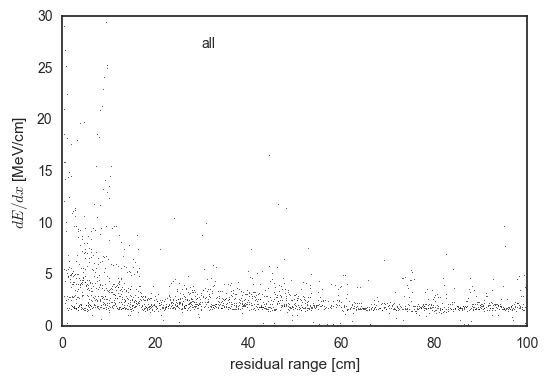

In [124]:
dEdx_scatter( hits , label='all' )

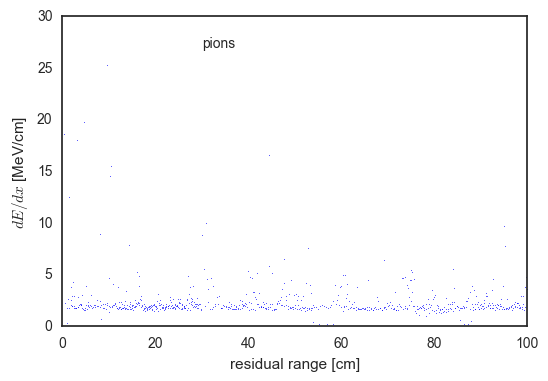

In [125]:
dEdx_scatter( pi_hits , color='blue' , label='pions')

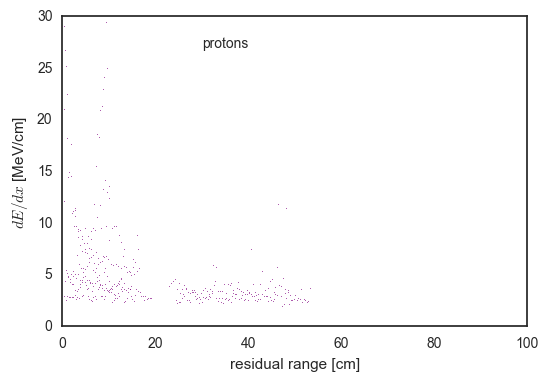

In [126]:
dEdx_scatter( p_hits , color='purple' , label='protons')

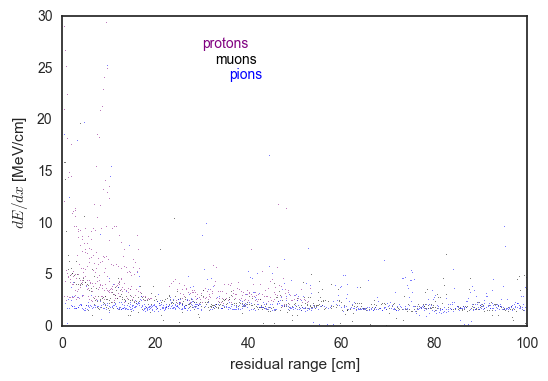

In [141]:
dEdx_scatter_mulitple( [p_hits , mu_hits , pi_hits] , 
                      labels=['protons','muons','pions'] ,
                      colors=['purple','black','blue'])

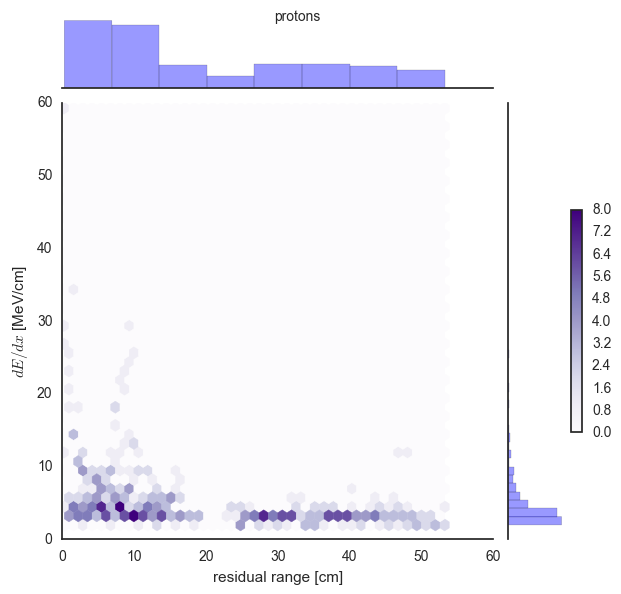

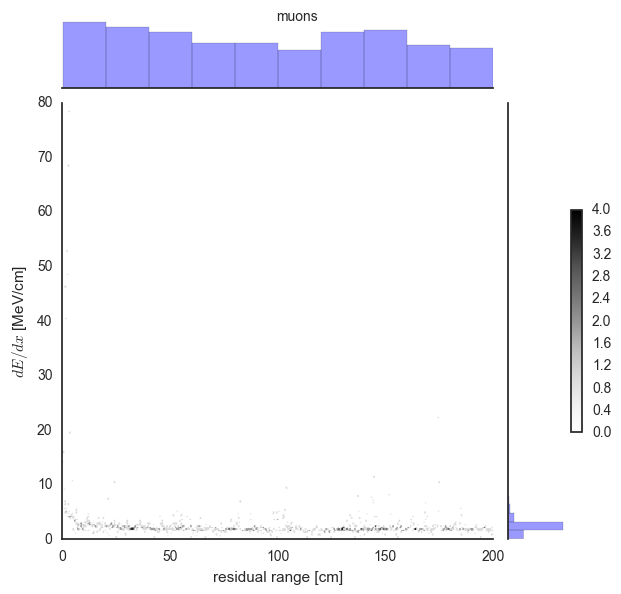

In [154]:
dEdx_jointplot(p_hits , cmap='Purples' , label='protons')
dEdx_jointplot(mu_hits , cmap='Greys' , label='muons')